<a href="https://colab.research.google.com/github/divya2509/Write-a-data-science-blog-post/blob/master/Analysing_Data_Science_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math
import warnings
from matplotlib.lines import Line2D


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Business Understanding

The following questions are to be answered: 
1. Which language should one start learning for coding in Data Science?
2. What sources do people use for learning Data Science?
3. What platforms do people use for learning Data Science?
4. What are the most popular ML frameworks according to experience in industry?
5. What are the most used IDE's according to experience in Data Science? 

# Data Understanding

In [0]:
multiplechoice_2019 = pd.read_csv('/content/drive/My Drive/kaggle2019/multiple_choice_responses.csv', low_memory= False)
# Using the data from Kaggle 2019 ML and DS survey

In [0]:
from pandas_profiling import ProfileReport

In [15]:
!pip install pandas-profiling==2.8.0

     |████████████████████████████████| 266kB 9.6MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 604kB 16.3MB/s 
     |████████████████████████████████| 3.1MB 31.3MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 296kB 51.5MB/s 
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=c036a8d838d09b6abf5616f8b7c6638c7972f8f84ab1d886c3650d21bd294b69
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=f2b85449267b0a2d528483b4875403461e883c860cf99fc24c345dbcf5ca963c
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=186ff4f8d076d61c7224a6c4acf3d205b719a00d9bf7af3e4f11

In [4]:
profile2019 = ProfileReport(multiplechoice_2019,minimal=True)
profile2019

# Data Preparation

In [0]:
multiplechoice_2019.columns = [x.split('_')[0] for x in list(multiplechoice_2019.columns)]
multiplechoice_2019.columns = multiplechoice_2019.columns + '_' + multiplechoice_2019.iloc[0]
multiplechoice_2019 = multiplechoice_2019.drop([0])

### Preparing data for ML frameworks

In [0]:
ml_fw = multiplechoice_2019.iloc[:,[117] + list(range(155,165))]
ml_fw.columns = ['ML exp'] + [x.split('Choice -')[1].split(' (')[0] for x in ml_fw.columns[1:]]
ml_fw = ml_fw.reindex(list(ml_fw['ML exp'].dropna().index))
#Dropping rows with ML Experience not mentioned as we want to examine Framework used VS Experience
ml_fw = ml_fw.groupby('ML exp').count().iloc[:-1].reindex(['< 1 years', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-15 years', '20+ years'])
ml_fw = ml_fw.fillna(0).astype('int').iloc[1:]
#Filling NA values with 0 as it doesn't increases count of any field

### Preparing data for Popular IDE's

In [0]:
ide = multiplechoice_2019.iloc[:,55:66]
ide.columns = ['Coding exp'] + [x.split('Choice -')[1].split(' (')[0] for x in ide.columns[1:]]
ide = ide.reindex(list(ide['Coding exp'].dropna().index))
#Dropping rows with Coding Experience not mentioned as we want to examine IDE used VS Experience
ide = ide.groupby('Coding exp').count().iloc[:-1].reindex(['< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years'])
ide.columns = ['Jupyter', 'RStudio', 'PyCharm', 'Atom', 'MATLAB', 'Visual Studio / VS Code', 'Spyder', 'Vim / Emacs', 'Notepad++', 'Sublime Text']

### Preparing data for most used coding languages

In [0]:
lang_recom = multiplechoice_2019.iloc[:,95].value_counts().to_frame().drop(index=['Other','None'])
# Counting the no. of people who recommended a certain language while ignoring 'Other' and 'None' types
lang_recom.columns = ['Language Recommended']

### Preparing data for sources for learning Data Science 

In [10]:
source = multiplechoice_2019.iloc[:,22:32]
for col in source.columns:
    source[col] = source[col].value_counts()[0]
src_name = [col.split('Choice - ')[1].split(' (')[0] for col in source.columns]
source.columns = src_name
source = source.drop_duplicates().T
# Counting the no. of people who recommended a source and dropping duplicate values
source = source.sort_values(by=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Preparing data for platforms for learning Data Science

In [11]:
platform =  multiplechoice_2019.iloc[:,35:45]
for col in platform.columns:
    platform[col] = platform[col].value_counts()[0]
plt_name = [col.split('Choice - ')[1].split(' (')[0] for col in platform.columns]
platform.columns = plt_name
platform = platform.drop_duplicates().T
# Counting the no. of people who recommended a platform and dropping duplicate values
platform = platform.sort_values(by=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Creating functions for plotting Barplot and Heatmap

In [0]:
def create_barplot(data_plot,x_label,y_label,plot_title,scale):
  """This function will create horizontal barplot for the given data"""
  data_plot.plot(kind='barh', figsize=(16,8), color = 'mediumslateblue', legend=False)
  plt.xscale(scale)
  plt.xlabel(x_label, fontsize = 'large')
  plt.ylabel(y_label, fontsize = 'large')
  plt.title(plot_title, fontsize = 'x-large')


In [0]:
def create_heatmap(data_plot,x_label,y_label,plot_title):
  """This function will create heatmaps for the given data"""
  fig, ax = plt.subplots(figsize=(16,8))
  x = sns.heatmap(data_plot, annot= True, fmt="d", linewidths=.5, cmap='GnBu')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  plt.xlabel(x_label, fontsize = 'large')
  plt.ylabel(y_label, fontsize = 'large')
  plt.title(plot_title, fontsize = 'large')
  return x

# Getting answers to the question we asked

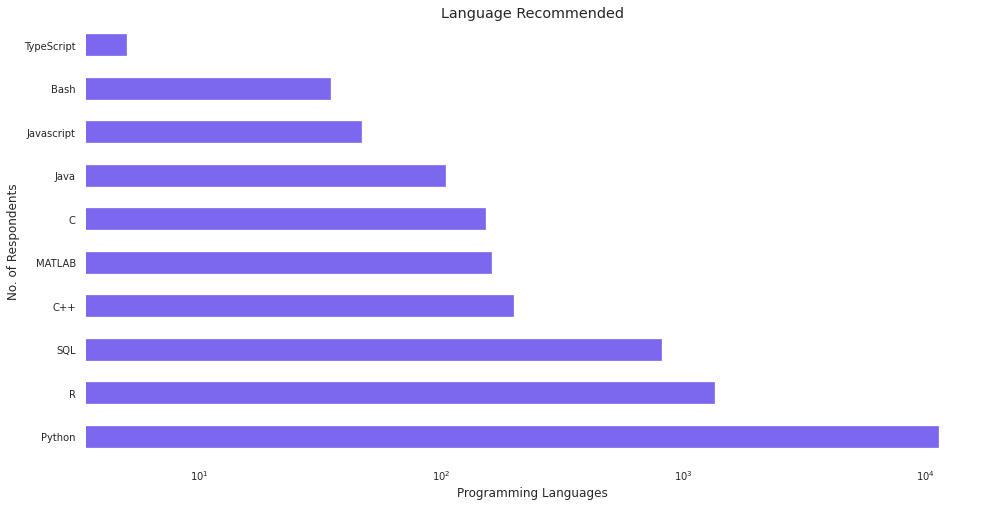

In [14]:
create_barplot(lang_recom,"Programming Languages","No. of Respondents","Language Recommended","log")

**Python** is the clear winner as it is the most used and recommended language. Python is versatile, easy to use and has less development time. It is open-source and has a great community support.

R is second most recommended language after python and is closely followed by SQL. R is commonly used in Academics for statistical analysis and SQL for communicating with databases.

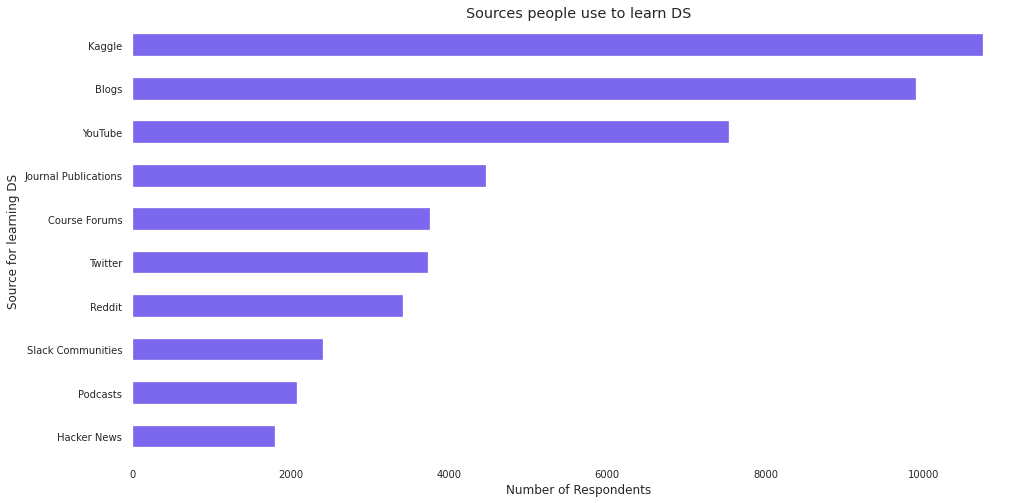

In [15]:
create_barplot(source,'Number of Respondents',"Source for learning DS","Sources people use to learn DS","linear")

The most preferred source for learning Data Science is **Kaggle** which is closely followed by educational Blogs and YouTube. Kaggle is the world’s largest community of active data scientists and it is where you can work with them, learn from them and participate in challenging Data Science Competitions.

Youtube and Blogs are another sources where one can find quality Data Science content for free. They are even used more than Journal Publications and books.

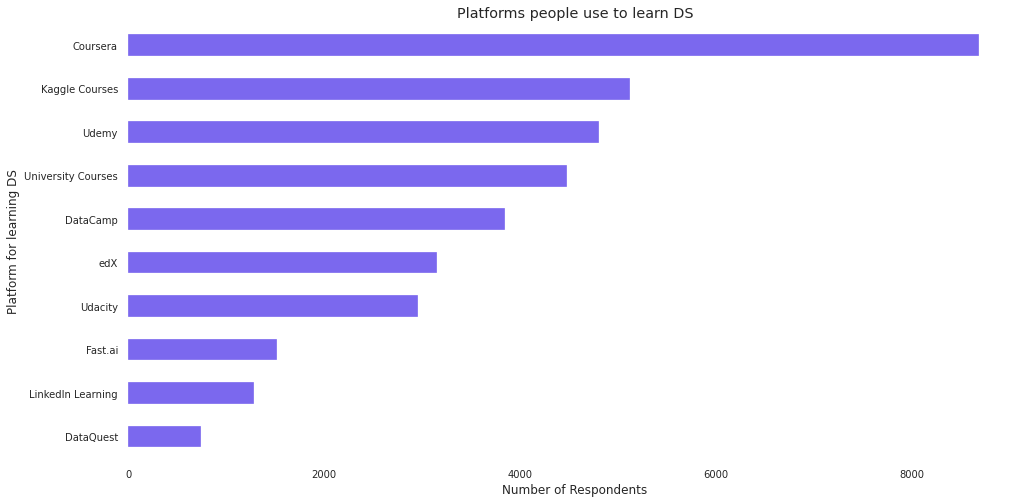

In [16]:

create_barplot(platform,'Number of Respondents',"Platform for learning DS","Platforms people use to learn DS","linear")

In the digital era, the trend of education is shifting from university courses to online platforms. **Coursera** is the most used platform for learning Data Science which is followed by Kaggle Courses and Udemy.

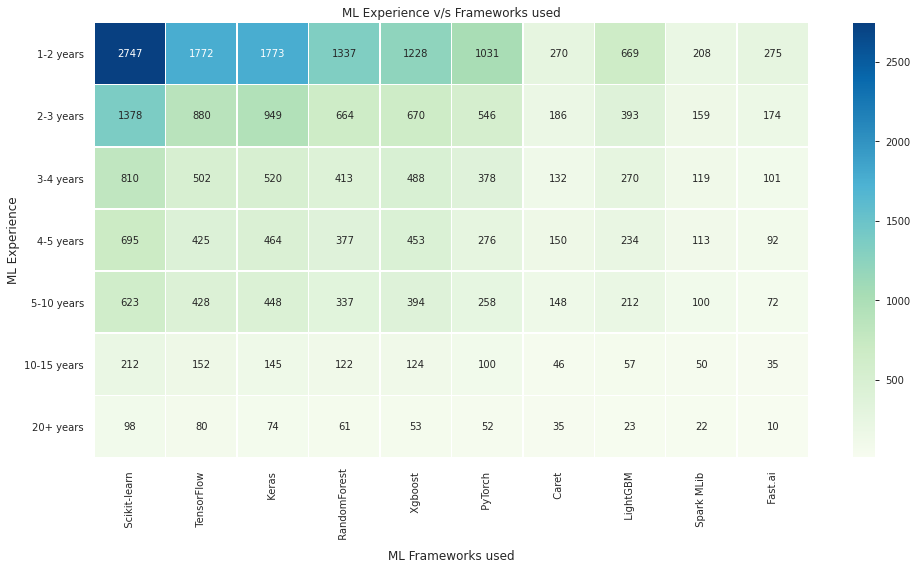

In [17]:
create_heatmap(ml_fw,'ML Frameworks used','ML Experience','ML Experience v/s Frameworks used')

**Scikit-learn** is the most popular Machine Learning Framework/Library.
It has became an indispensible part of the Data Science community. A wide variety of algorithms are implemented in it which are broadly classified into Classification, Regression, Clustering, Dimensionality Reduction, Pre-Processing and Model Selection

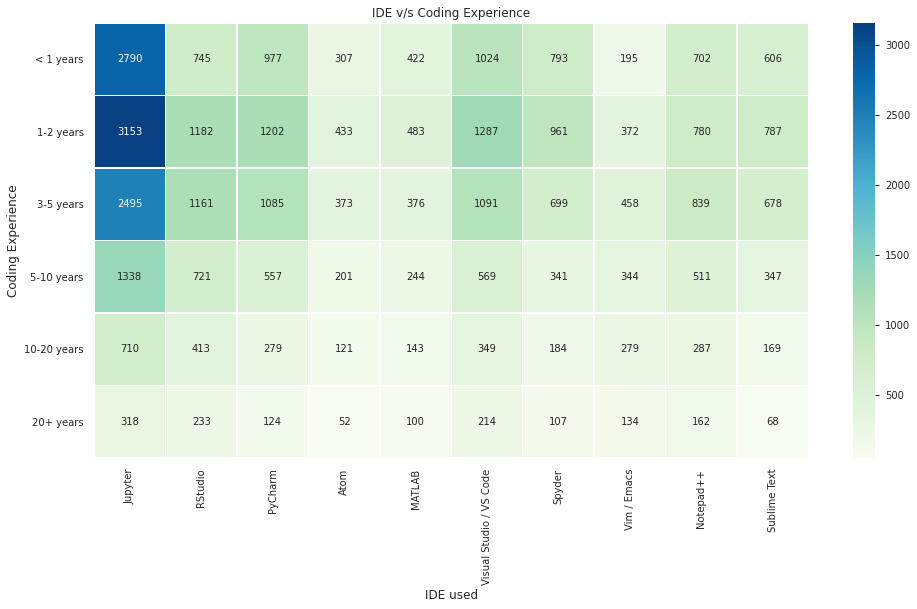

In [18]:
create_heatmap(ide,'IDE used','Coding Experience','IDE v/s Coding Experience')

**Jupyter Notebook** is the most popular IDE in the Data Science Community. It has support for many languages and it is very beginner-friendly.It enhances productivity and facilitates easy collaboration as full-fledged reports can also be created in it.
